# Final Processing
The final processing stage requires:
1. Quick validation of catalogues and Bayesian Pvalue maps
2. Skewness level
3. Adding flag to catalogue

In [1]:
import seaborn as sns
from astropy.table import Table
%matplotlib inline
import numpy as np
import pylab as plt

In [2]:
pwd

'/home/mc741/Documents/git_hub/dmu_products/dmu26/dmu26_XID+SPIRE_AKARI-NEP'

## Read tables

In [3]:
cat=Table.read('./data/dmu26_XID+SPIRE_AKARI-NEP_cat.fits')


In [4]:
cat[0:10]

HELP_ID,RA,Dec,F_SPIRE_250,FErr_SPIRE_250_u,FErr_SPIRE_250_l,F_SPIRE_350,FErr_SPIRE_350_u,FErr_SPIRE_350_l,F_SPIRE_500,FErr_SPIRE_500_u,FErr_SPIRE_500_l,Bkg_SPIRE_250,Bkg_SPIRE_350,Bkg_SPIRE_500,Sig_conf_SPIRE_250,Sig_conf_SPIRE_350,Sig_conf_SPIRE_500,Rhat_SPIRE_250,Rhat_SPIRE_350,Rhat_SPIRE_500,n_eff_SPIRE_250,n_eff_SPIRE_500,n_eff_SPIRE_350,Pval_res_250,Pval_res_350,Pval_res_500
,degrees,degrees,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,,,,
bytes27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
HELP_J181349.464+665922.962,273.456099911287,66.98971167217739,1.4995126,3.5491102,0.3772317,1.4953313,3.6839046,0.40444535,0.966326,2.2083776,0.27856466,5.170967,3.1304178,-0.26711693,7.432678,7.5461392,0.18977605,1.0004193,0.999577,1.0060884,2000.0,2000.0,2000.0,0.004,0.261,0.139
HELP_J181342.788+665941.183,273.428282281287,66.99477303217739,1.6666814,3.9037442,0.37811902,1.290136,3.2815948,0.32693106,0.89683205,2.3446941,0.24262041,5.170967,3.1304178,-0.26711693,7.432678,7.5461392,0.18977605,0.9997959,0.9985677,1.004575,2000.0,2000.0,2000.0,0.01,0.139,0.096
HELP_J181342.982+665955.952,273.429091821287,66.9988756521774,1.8761168,4.7402616,0.5099872,1.5193362,3.7315116,0.3591354,1.0123081,2.6559727,0.25873438,5.170967,3.1304178,-0.26711693,7.432678,7.5461392,0.18977605,0.9993558,0.9992816,1.0044371,2000.0,2000.0,2000.0,0.001,0.112,0.047
HELP_J181416.006+665941.274,273.566691051287,66.9947982121774,1.5184457,3.7701788,0.37684038,2.670849,6.127812,0.6980195,1.34567,3.0550923,0.41649252,5.170967,3.1304178,-0.26711693,7.432678,7.5461392,0.18977605,0.99859107,0.99984896,1.1264069,2000.0,29.0,2000.0,1.0,1.0,0.147
HELP_J181406.396+670016.071,273.526650511287,67.0044642821774,4.084732,8.451095,1.2749403,2.0671387,5.3683863,0.56230295,2.0820267,4.3754134,0.68871814,5.170967,3.1304178,-0.26711693,7.432678,7.5461392,0.18977605,0.99863786,0.9984685,1.1174097,2000.0,31.0,2000.0,0.998,0.617,0.139
HELP_J181413.678+665946.778,273.556989631287,66.99632723217739,2.0723414,4.92067,0.5683869,4.0680666,8.376897,1.1274165,0.65864277,1.7685572,0.17401066,5.170967,3.1304178,-0.26711693,7.432678,7.5461392,0.18977605,1.0000198,0.99882114,1.09626,2000.0,36.0,2000.0,1.0,1.0,0.145
HELP_J181412.643+665944.891,273.552678491287,66.9958031021774,5.653455,10.158618,1.9090295,3.1174893,7.2474895,0.89288247,0.91745865,2.4274683,0.25390327,5.170967,3.1304178,-0.26711693,7.432678,7.5461392,0.18977605,1.0006,0.99946856,1.1100246,2000.0,32.0,2000.0,1.0,1.0,0.147
HELP_J181415.237+670038.584,273.563486971287,67.0107178921774,1.6100194,3.851275,0.44167256,1.550568,3.546749,0.42067027,1.2498602,2.8430727,0.41459432,5.170967,3.1304178,-0.26711693,7.432678,7.5461392,0.18977605,0.9984707,0.9988682,1.1853082,2000.0,20.0,2000.0,1.0,1.0,0.144


## Look at Symmetry of PDFs to determine depth level of catalogue

/home/mc741/anaconda3/envs/herschelhelp/lib/python3.8/site-packages/seaborn/axisgrid.py:1774: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.fig.savefig(*args, **kwargs)


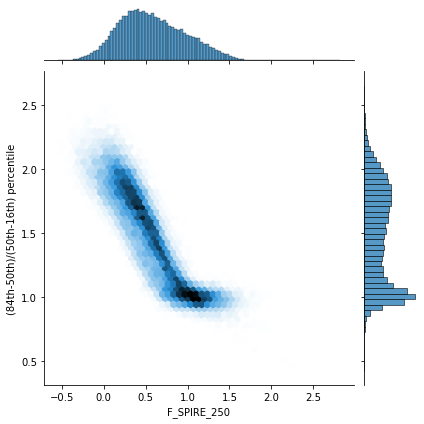

In [11]:
skew=(cat['FErr_SPIRE_250_u']-cat['F_SPIRE_250'])/(cat['F_SPIRE_250']-cat['FErr_SPIRE_250_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(cat['F_SPIRE_250']),y=skew, kind='hex')

g.savefig('../../data/figs/sk_SPIRE250_AKARI-NEP.png', bbox='tight')
g.savefig('../../data/figs/sk_SPIRE250_AKARI-NEP.pdf', bbox='tight')

/home/mc741/anaconda3/envs/herschelhelp/lib/python3.8/site-packages/seaborn/axisgrid.py:1774: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.fig.savefig(*args, **kwargs)


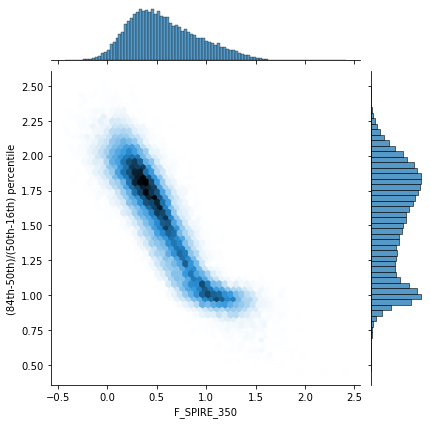

In [12]:
skew=(cat['FErr_SPIRE_350_u']-cat['F_SPIRE_350'])/(cat['F_SPIRE_350']-cat['FErr_SPIRE_350_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(cat['F_SPIRE_350']),y=skew, kind='hex')

g.savefig('../../data/figs/sk_SPIRE350_AKARI-NEP.png', bbox='tight')
g.savefig('../../data/figs/sk_SPIRE350_AKARI-NEP.pdf', bbox='tight')

/home/mc741/anaconda3/envs/herschelhelp/lib/python3.8/site-packages/seaborn/axisgrid.py:1774: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.fig.savefig(*args, **kwargs)
/home/mc741/anaconda3/envs/herschelhelp/lib/python3.8/site-packages/seaborn/axisgrid.py:1774: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.fig.savefig(*args, **kwargs)


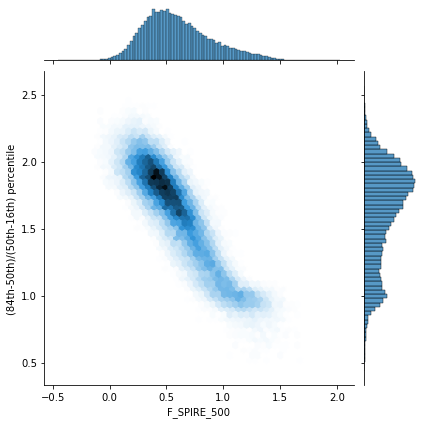

In [13]:
skew=(cat['FErr_SPIRE_500_u']-cat['F_SPIRE_500'])/(cat['F_SPIRE_500']-cat['FErr_SPIRE_500_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(cat['F_SPIRE_500']),y=skew, kind='hex')

g.savefig('../../data/figs/sk_SPIRE500_AKARI-NEP.pdf', bbox='tight')
g.savefig('../../data/figs/sk_SPIRE500_AKARI-NEP.png', bbox='tight')

## Add flag to catalogue

In [7]:
from astropy.table import Column
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_spire_250'))
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_spire_350'))
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_spire_500'))

In [8]:
ind_250=(cat['Pval_res_250']>0.5) | (cat['F_SPIRE_250'] < 5)
ind_350=(cat['Pval_res_350']>0.5) | (cat['F_SPIRE_350'] < 5)
ind_500=(cat['Pval_res_500']>0.5) | (cat['F_SPIRE_500'] < 6)


In [9]:
print(ind_250.sum(),ind_350.sum(),ind_500.sum(),len(cat))

25638 27524 28090 35319


In [10]:
cat['flag_spire_250'][ind_250]=True
cat['flag_spire_350'][ind_350]=True
cat['flag_spire_500'][ind_500]=True

In [12]:
cat.write('./data/dmu26_XID+SPIRE_AKARI-NEP_cat_20190312.fits', format='fits',overwrite=True)


### Check Map


In [14]:
from astropy.io import fits
import pylab as plt

In [20]:
SPIRE_pval=fits.open('./data/dmu26_XID+SPIRE_psw_AKARI-NEP_Bayes_Pval.fits')


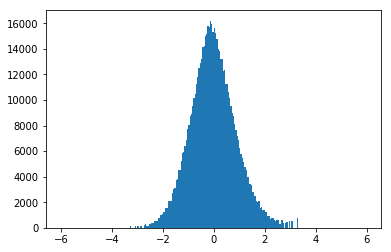

In [21]:
plt.hist(SPIRE_pval[1].data[np.isfinite(SPIRE_pval[1].data)],bins=np.arange(-6,6,0.05));